In [32]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from hierarqcal import (
    Qhierarchy,
    Qcycle,
    Qpermute,
    Qmask,
    Qunmask,
    Qpivot,
    Qinit,
    Qmotif,
    Qmotifs,
    plot_motif,
    plot_circuit,
    Qunitary,
)
from pennylane import AngleEmbedding
import pennylane as qml
from hierarqcal.pennylane.pennylane_circuits import V2, U2, V4


In [34]:
def ansatz_conv_g(bits, symbols):  # 10 params
    qml.RX(symbols[0], wires=bits[0])
    qml.RX(symbols[1], wires=bits[1])
    qml.RZ(symbols[2], wires=bits[0])
    qml.RZ(symbols[3], wires=bits[1])
    qml.CRZ(symbols[4], wires=[bits[1], bits[0]])
    qml.CRZ(symbols[5], wires=[bits[0], bits[1]])
    qml.RX(symbols[6], wires=bits[0])
    qml.RX(symbols[7], wires=bits[1])
    qml.RZ(symbols[8], wires=bits[0])
    qml.RZ(symbols[9], wires=bits[1])
U_ansatz_conv_g = Qunitary(ansatz_conv_g, n_symbols=10, arity=2)

def ansatz_conv_a(bits, symbols=None):  # 2 params
  qml.RY(symbols[0], wires=[bits[0]])
  qml.RY(symbols[1], wires=[bits[1]])
  qml.CNOT(wires=[bits[0], bits[1]])
U_ansatz_conv_a = Qunitary(ansatz_conv_a, n_symbols=2, arity=2)

def ansatz_conv_b(bits, symbols=None):  # 2 params
  qml.Hadamard(wires=[bits[0]])
  qml.Hadamard(wires=[bits[1]])
  qml.CZ(wires=[bits[0], bits[1]])
  qml.RX(symbols[0], wires=[bits[0]])
  qml.RX(symbols[1], wires=[bits[1]])
U_ansatz_conv_b = Qunitary(ansatz_conv_b, n_symbols=2, arity=2)

In [36]:
import pennylane as qml
from hierarqcal.pennylane.pennylane_circuits import V2, U2, V4

def get_circuit(hierq):
    dev = qml.device("default.qubit", wires=hierq.tail.Q)

    @qml.qnode(dev)
    def circuit():
        if isinstance(next(hierq.get_symbols(), False), sp.Symbol):
            # Pennylane doesn't support symbolic parameters, so if no symbols were set (i.e. they are still symbolic), we initialize them randomly
            hierq.set_symbols(np.random.uniform(0, 2 * np.pi, hierq.n_symbols))
        hierq(
            backend="pennylane"
        )  # This executes the compute graph in order
        return [qml.expval(qml.PauliZ(wire)) for wire in hierq.tail.Q]
        # return qml.counts()

    return circuit

def draw_circuit(circuit, **kwargs):
    fig, ax = qml.draw_mpl(circuit)(**kwargs)

In [38]:
u2 = Qunitary(U2, 1, 2)
v2 = Qunitary(V2, 0, 2)
v4 = Qunitary(V4, 0, 4)

In [40]:
def ansatz_pool_2(bits, symbols=None):
    qml.CNOT(wires=[bits[0], bits[1]])
U_ansatz_pool_2 = Qunitary(ansatz_pool_2, n_symbols=0, arity=2)



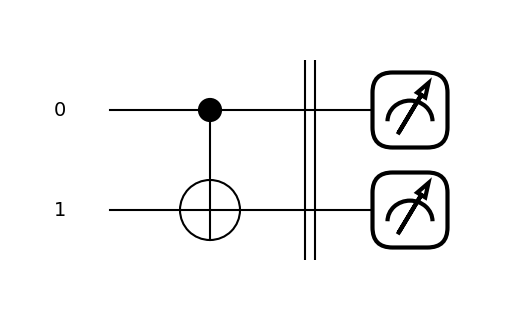

In [47]:
motif = Qinit(2) + Qmask(mapping=U_ansatz_pool_2)
circuit = get_circuit(motif)
draw_circuit(circuit)

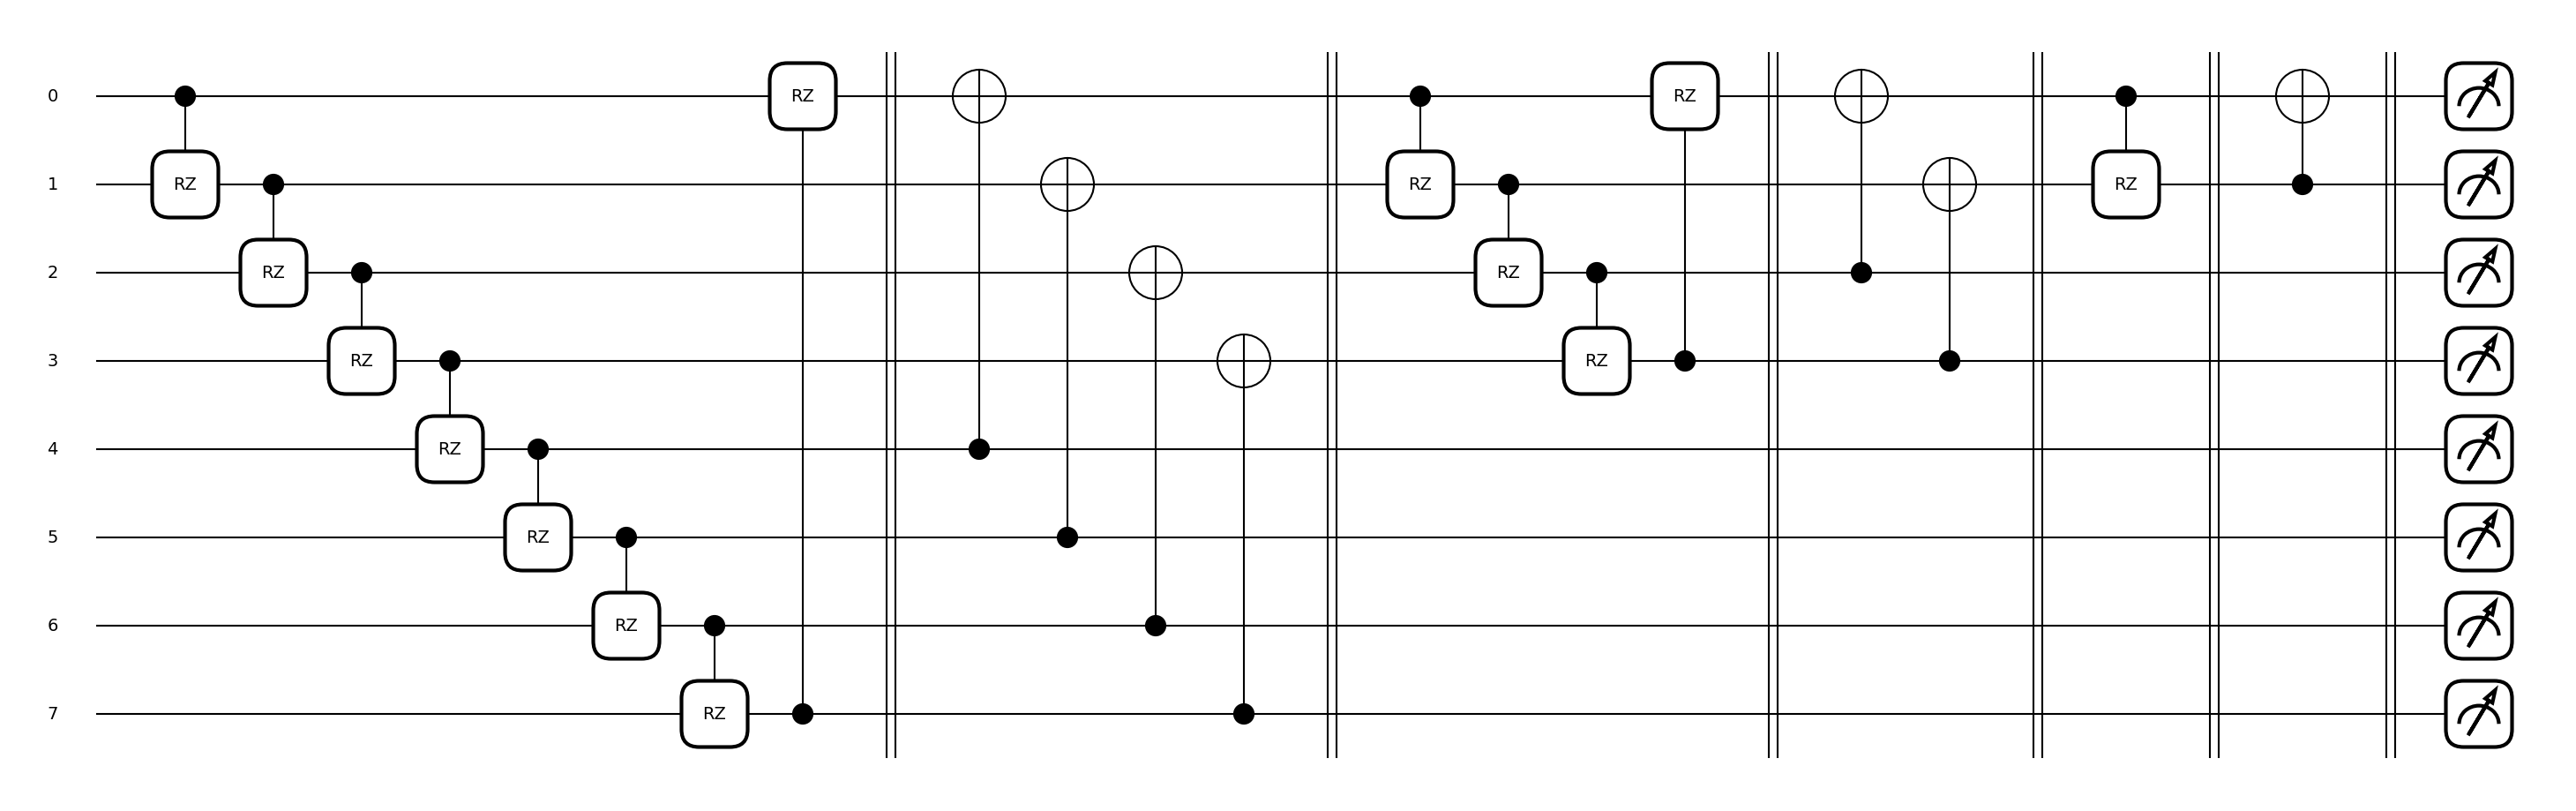

In [39]:
nq = 3
hierq = Qinit(2**nq) + (Qcycle(mapping=u2) + Qmask("*!", mapping=v2))*nq
circuit = get_circuit(hierq)
draw_circuit(circuit)